In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps

In [121]:
T=120*0.0083
C=100
P=25
A=50
w0=2*np.pi/3.5 # 1/nm
c=T*C*w0**2
p=T*P*w0**2

def cs(f):
    return c*(1-(C/(4*A))*np.sqrt(T/(A*f)))

def g(f):
    return f - np.sqrt(f*T/A)

def xs(f,s):
    return 1/(1-p/cs(f)) - np.sqrt(p/(2*g(f)*(1-p/cs(f))))*abs(s)

def sig_s(f):
    return (1/cs(f))*np.sqrt(2*p*g(f)/(1-p/cs(f)))

def sig_p(f):
    return (1/p)*np.sqrt(2*p*g(f)/(1-p/cs(f)))

def FE(f,s):
    return xs(f,s)*(-g(f) + 0.5*cs(f)*sig_s(f)**2) + (1-xs(f,s))*0.5*p*sig_p(f)**2

           4             3             2
1.141e-09 x - 1.188e-07 x + 0.0001461 x + 0.1684 x + 95.28


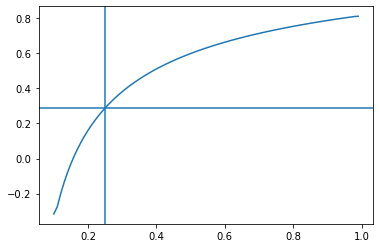

In [217]:
sig_vals=np.arange(0.02,0.1,0.001)
f_vals=np.arange(0.1,1,0.01)
FE_fix_f=FE(f_vals, 0.06)
z_vals=-np.gradient(FE_fix_f)/np.gradient(f_vals)
# z_vals=np.linspace(0,0.5,len(f_vals))
FE_fix_z=FE_fix_f+f_vals*z_vals

f_av=np.gradient(FE_fix_z)/np.gradient(z_vals)
# k_z=np.gradient(-np.gradient(FE_fix_z)/np.gradient(z_vals))/np.gradient(z_vals)
# f_compute=-np.gradient(FE_fix_z)/np.gradient(z_vals)
# plt.plot(sig_vals, FE(0.25, sig_vals),'.-')
plt.plot(f_vals, z_vals)
plt.axvline(0.25)
plt.axhline(0.29)
# plt.plot(z_vals, 330*FE_fix_z)
# plt.plot(f_vals, 330*FE_fix_f)

# plt.plot(z_vals*660, 660*FE_fix_z,'.')
# plt.plot(f_vals,f_av)
# plt.plot(f_vals, -np.gradient(FE(f_vals,0.04))/np.gradient(f_vals))


# plt.plot(z_vals, FE_fix_z)
# plt.plot(z_vals,k_z,'.-')

popt=np.poly1d(np.polyfit(z_vals*660, 660*FE_fix_z,4))
# plt.plot(np.linspace(0.,660,100), popt(np.linspace(0.,660,100)),'k--')
print(popt)
# plt.plot(f_vals*4.1, fe_const_z,'r.-')
# plt.plot(f_vals*4.1, fe_const_f,'g.-')
# plt.plot(f_vals, sig_s(f_vals),'-')
# plt.axhline(0,c='k',ls='--')
# plt.axhline(1,c='k',ls='--')
# plt.ylim(0,150)
# plt.xlim(0,660)


In [219]:
330*0.29

95.69999999999999